In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

#display
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import folium
plt.rcParams["figure.figsize"] = (15,15)
from IPython.display import clear_output
import contextily as cx

import sys
sys.path.append("../")
import src.supportExtract as se

import sys
sys.path.append("../")
import src.supportClean as sc

import sys
sys.path.append("../")
import src.supportCharts as sch

# data input
let's see what layers are on the geopackage:

In [2]:
path_gpckg = '../data/catastro/catastro_madrid.gpkg'
dict_catastro = se.catastroLayers(path_gpckg)

the geopackage has layers: ['CadastralParcel', 'CadastralZoning', 'BuildingPart', 'Building', 'OtherConstruction', 'Address']
adding layer CadastralParcel to the output dictionary...
done
adding layer CadastralZoning to the output dictionary...
done
adding layer BuildingPart to the output dictionary...
done
adding layer Building to the output dictionary...
done
adding layer OtherConstruction to the output dictionary...
done
adding layer Address to the output dictionary...
done


In [3]:
gdf_CadastralParcel= dict_catastro[0]
gdf_CadastralZoning= dict_catastro[1]
gdf_BuildingPart = dict_catastro[2]
gdf_Building = dict_catastro[3]
gdf_OtherConstruction = dict_catastro[4]
gdf_Address = dict_catastro[5]

the variables that come form the Spanish Cadaster are:
- `cad_tot_houses` -> total number of houses per parcel
<br>the values go from 0 to 1750, being the median value around 250. that there are nulls in the `cad_tot_houses` column could mean that the building is not residential.
- `cad_tot_hab` -> total inhabitants
<br>the inhabitants per building? not sure if this data is cadastral. It can be the inhabitants of the area the buiding is located.
- `cad_tot_hotels` -> total number of hotels (buildigs that are classified as hotels by the cadaster)
<br>number of hotels in the area. The avg is zero, depending on the area of the city you're evaluating.
- `cad_med_consq` -> median value of the construction quality of the cadastral horizontal division
<br>is a 1-10 scale, so it is the median rating that the buildings have in the area, based on the construction techniques. The median value is a bit bigger than 4.
- `cad_tot_parcs` -> land surface
<br>is the plot that the buildings are build upon. The normal value is less than 50sqm? 
- `cad_pk` ->
- `cad_tot_srf_houses` -> houses' surface
<br>the built surface of the house classification. The median value is less than 25000 sqm.
- `cad_tot_srf_hotels` -> hotels' surface. 
<br> the built surface of hotels. The median value is around 0, as we've seen the hotel count is small.

In [4]:
print(gdf_CadastralParcel.shape)
gdf_CadastralParcel.head(5)

(141544, 11)


gml_id  areaValue areaValue_uom beginLifespanVersion   
0  ES.SDGC.CP.000200500VK56E       1268            m2  2013-10-17T00:00:00  \
1  ES.SDGC.CP.000205600VK56E        297            m2  2013-10-17T00:00:00   
2  ES.SDGC.CP.000205700VK56E        155            m2  2013-10-17T00:00:00   
3  ES.SDGC.CP.000205800VK56E        174            m2  2013-10-17T00:00:00   
4  ES.SDGC.CP.000205900VK56E        172            m2  2013-10-17T00:00:00   

   endLifespanVersion         localId   namespace           label   
0                 NaN  000200500VK56E  ES.SDGC.CP  000200500VK56E  \
1                 NaN  000205600VK56E  ES.SDGC.CP  000205600VK56E   
2                 NaN  000205700VK56E  ES.SDGC.CP  000205700VK56E   
3                 NaN  000205800VK56E  ES.SDGC.CP  000205800VK56E   
4                 NaN  000205900VK56E  ES.SDGC.CP  000205900VK56E   

  nationalCadastralReference                   pos   
0             000200500VK56E  451607.03 4467199.27  \
1             000205600VK56E  451592.44 4467170.83   
2             000205700VK56E  451587.93 4467161.77   
3             000205800VK56E  451584.62 4467155.04   
4             000205900VK56E  451581.09 4467147.85   

                                            geometry  
0  MULTIPOLYGON (((961217.399 4481193.520, 961202...  
1  MULTIPOLYGON (((961211.833 4481181.394, 961197...  
2  MULTIPOLYGON (((961209.303 4481174.850, 961195...  
3  MULTIPOLYGON (((961206.406 4481167.358, 961192...  
4  MULTIPOLYGON (((961203.508 4481159.885, 961189...

In [5]:
print(gdf_CadastralZoning.shape)
gdf_CadastralZoning.head(5)

(12347, 13)


gml_id beginLifespanVersion endLifespanVersion   
0  ES.SDGC.CP.Z.28900A000  2019-04-12T00:00:00                NaN  \
1  ES.SDGC.CP.Z.28900A001  2019-04-11T00:00:00                NaN   
2  ES.SDGC.CP.Z.28900A002  2013-10-17T00:00:00                NaN   
3  ES.SDGC.CP.Z.28900A003  2014-10-17T00:00:00                NaN   
4  ES.SDGC.CP.Z.28900A004  2013-10-17T00:00:00                NaN   

   estimatedAccuracy estimatedAccuracy_uom    localId     namespace label   
0                1.0                     m  28900A000  ES.SDGC.CP.Z   000  \
1                1.0                     m  28900A001  ES.SDGC.CP.Z   001   
2                1.0                     m  28900A002  ES.SDGC.CP.Z   002   
3                1.0                     m  28900A003  ES.SDGC.CP.Z   003   
4                1.0                     m  28900A004  ES.SDGC.CP.Z   004   

  LocalisedCharacterString nationalCadastalZoningReference   
0                POLIGONO                        28900A000  \
1                POLIGONO                        28900A001   
2                POLIGONO                        28900A002   
3                POLIGONO                        28900A003   
4                POLIGONO                        28900A004   

   originalMapScaleDenominator                   pos   
0                         5000   440302.42 4492704.6  \
1                         5000   444909.27 4497953.5   
2                         5000  446474.92 4496527.94   
3                         5000  447749.11 4494280.98   
4                         5000  447065.76 4493887.71   

                                            geometry  
0  MULTIPOLYGON (((948177.040 4505957.695, 948177...  
1  MULTIPOLYGON (((951975.321 4512908.139, 951989...  
2  MULTIPOLYGON (((953565.188 4510134.958, 953559...  
3  MULTIPOLYGON (((956903.888 4507489.306, 956903...  
4  MULTIPOLYGON (((953513.120 4508677.648, 953504...

In [6]:
print(gdf_BuildingPart.shape)
gdf_BuildingPart.head(5)

(851937, 14)


gml_id beginLifespanVersion  conditionOfConstruction   
0  ES.SDGC.BU.  VK4700H_part1  2021-09-24T00:00:00                      NaN  \
1  ES.SDGC.BU.  VK4700H_part2  2021-09-24T00:00:00                      NaN   
2  ES.SDGC.BU.  VK4700H_part3  2021-11-10T00:00:00                      NaN   
3  ES.SDGC.BU.  VK4700H_part4  2021-11-10T00:00:00                      NaN   
4  ES.SDGC.BU.  VK4700H_part5  2022-04-21T00:00:00                      NaN   

         localId   namespace  horizontalGeometryEstimatedAccuracy   
0  VK4700H_part1  ES.SDGC.BU                                  0.1  \
1  VK4700H_part2  ES.SDGC.BU                                  0.1   
2  VK4700H_part3  ES.SDGC.BU                                  0.1   
3  VK4700H_part4  ES.SDGC.BU                                  0.1   
4  VK4700H_part5  ES.SDGC.BU                                  0.1   

  horizontalGeometryEstimatedAccuracy_uom horizontalGeometryReference   
0                                       m                   footPrint  \
1                                       m                   footPrint   
2                                       m                   footPrint   
3                                       m                   footPrint   
4                                       m                   footPrint   

   referenceGeometry  numberOfFloorsAboveGround  heightBelowGround   
0               True                          3                  0  \
1               True                          3                  0   
2               True                          5                  0   
3               True                          4                  0   
4               True                          4                  0   

  heightBelowGround_uom  numberOfFloorsBelowGround   
0                     m                          0  \
1                     m                          0   
2                     m                          0   
3                     m                          0   
4                     m                          0   

                                            geometry  
0  POLYGON ((949290.602 4484031.865, 949297.070 4...  
1  POLYGON ((949213.578 4484057.098, 949213.504 4...  
2  POLYGON ((949042.902 4483980.822, 949045.075 4...  
3  POLYGON ((949042.902 4483980.822, 949043.532 4...  
4  POLYGON ((949765.011 4484144.828, 949765.227 4...

In [7]:
print(gdf_Building.shape)
gdf_Building.head(5)

(124578, 25)


gml_id beginLifespanVersion conditionOfConstruction   
0       ES.SDGC.BU.  VK4700H  2022-05-10T00:00:00                       -  \
1  ES.SDGC.BU.RA610010000000  2016-11-16T00:00:00              functional   
2  ES.SDGC.BU.00006Z8VK4800A  2017-05-11T00:00:00                       -   
3  ES.SDGC.BU.000200100VK48E  2004-05-19T00:00:00              functional   
4  ES.SDGC.BU.000200500VK56E  2013-10-17T00:00:00                declined   

             beginning                  end endLifespanVersion   
0     --01-01T00:00:00     --01-01T00:00:00                NaN  \
1  1959-01-01T00:00:00  1991-01-01T00:00:00                NaN   
2     --01-01T00:00:00     --01-01T00:00:00                NaN   
3  1968-01-01T00:00:00  1968-01-01T00:00:00                NaN   
4  1995-01-01T00:00:00  1995-01-01T00:00:00                NaN   

                                   informationSystem       reference   
0  https://www1.sedecatastro.gob.es/CYCBienInmueb...         VK4700H  \
1  https://www1.sedecatastro.gob.es/CYCBienInmueb...  RA610010000000   
2  https://www1.sedecatastro.gob.es/CYCBienInmueb...  00006Z8VK4800A   
3  https://www1.sedecatastro.gob.es/CYCBienInmueb...  000200100VK48E   
4  https://www1.sedecatastro.gob.es/CYCBienInmueb...  000200500VK56E   

          localId   namespace  horizontalGeometryEstimatedAccuracy   
0         VK4700H  ES.SDGC.BU                                  0.1  \
1  RA610010000000  ES.SDGC.BU                                  0.1   
2  00006Z8VK4800A  ES.SDGC.BU                                  0.1   
3  000200100VK48E  ES.SDGC.BU                                  0.1   
4  000200500VK56E  ES.SDGC.BU                                  0.1   

  horizontalGeometryEstimatedAccuracy_uom horizontalGeometryReference   
0                                       m                   footPrint  \
1                                       m                   footPrint   
2                                       m                   footPrint   
3                                       m                   footPrint   
4                                       m                   footPrint   

   referenceGeometry     currentUse  numberOfBuildingUnits  numberOfDwellings   
0               True            NaN                      0                  0  \
1               True  1_residential                      1                  1   
2               True            NaN                      0                  0   
3               True  2_agriculture                      1                  0   
4               True   3_industrial                      1                  0   

   numberOfFloorsAboveGround   
0                        NaN  \
1                        NaN   
2                        NaN   
3                        NaN   
4                        NaN   

                                        documentLink format sourceStatus   
0  http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...   jpeg  NotOfficial  \
1  http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...   jpeg  NotOfficial   
2  http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...   jpeg  NotOfficial   
3  http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...   jpeg  NotOfficial   
4  http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...   jpeg  NotOfficial   

  officialAreaReference  value value_uom   
0        grossFloorArea      0        m2  \
1        grossFloorArea    105        m2   
2        grossFloorArea      0        m2   
3        grossFloorArea     26        m2   
4        grossFloorArea    646        m2   

                                            geometry  
0  MULTIPOLYGON (((948922.858 4484281.431, 948922...  
1  POLYGON ((955006.443 4494903.221, 955005.247 4...  
2  POLYGON ((948772.642 4493092.204, 948772.046 4...  
3  POLYGON ((949919.012 4500395.315, 949919.982 4...  
4  MULTIPOLYGON (((961202.515 4481199.009, 961203...

In [8]:
gdf_Building['currentUse'].value_counts()

currentUse
1_residential         110113
4_3_publicServices      3820
3_industrial            3544
4_2_retail              2787
4_1_office              2218
2_agriculture            304
Name: count, dtype: int64

`df_Building` is the layer that has the info on the buidings type. However, there's information missing on hotels so the layer needs to be enriched.

In [9]:
print(gdf_OtherConstruction.shape)
gdf_OtherConstruction.head(5)

(14517, 7)


gml_id beginLifespanVersion   
0  ES.SDGC.BU.0006601VK3800E_PI.1  2017-07-07T00:00:00  \
1  ES.SDGC.BU.0007201VK3800E_PI.2  2003-01-02T00:00:00   
2  ES.SDGC.BU.0007202VK3800E_PI.3  2006-06-19T00:00:00   
3  ES.SDGC.BU.0007203VK3800E_PI.4  2003-05-20T00:00:00   
4  ES.SDGC.BU.0007205VK3800E_PI.5  2012-03-14T00:00:00   

   conditionOfConstruction              localId   namespace   
0                      NaN  0006601VK3800E_PI.1  ES.SDGC.BU  \
1                      NaN  0007201VK3800E_PI.2  ES.SDGC.BU   
2                      NaN  0007202VK3800E_PI.3  ES.SDGC.BU   
3                      NaN  0007203VK3800E_PI.4  ES.SDGC.BU   
4                      NaN  0007205VK3800E_PI.5  ES.SDGC.BU   

  constructionNature                                           geometry  
0        openAirPool  POLYGON ((938674.985 4493003.093, 938672.905 4...  
1        openAirPool  POLYGON ((938584.906 4493137.993, 938589.317 4...  
2        openAirPool  POLYGON ((938671.295 4493110.708, 938671.770 4...  
3        openAirPool  POLYGON ((938606.606 4493042.625, 938604.116 4...  
4        openAirPool  POLYGON ((938555.746 4493057.894, 938554.869 4...

In [10]:
print(gdf_Address.shape)
gdf_Address.head(5)

(99999, 12)


gml_id                      localId   
0   ES.SDGC.AD.28.900.10.1.1730101VK4813B   28.900.10.1.1730101VK4813B  \
1  ES.SDGC.AD.28.900.10.10.1630113VK4813B  28.900.10.10.1630113VK4813B   
2  ES.SDGC.AD.28.900.10.12.1630114VK4813B  28.900.10.12.1630114VK4813B   
3   ES.SDGC.AD.28.900.10.3.1730101VK4813B   28.900.10.3.1730101VK4813B   
4   ES.SDGC.AD.28.900.10.6.1630111VK4813B   28.900.10.6.1630111VK4813B   

    namespace specification       method  default designator  type      level   
0  ES.SDGC.AD      Entrance  fromFeature     True          1     1  siteLevel  \
1  ES.SDGC.AD      Entrance  fromFeature     True         10     1  siteLevel   
2  ES.SDGC.AD      Entrance  fromFeature     True         12     1  siteLevel   
3  ES.SDGC.AD        Parcel  fromFeature     True          3     1  siteLevel   
4  ES.SDGC.AD      Entrance  fromFeature     True          6     1  siteLevel   

   validFrom beginLifespanVersion                        geometry  
0        NaN  2003-01-14T00:00:00  POINT (950119.405 4496166.440)  
1        NaN  2001-12-13T00:00:00  POINT (950115.452 4496138.670)  
2        NaN  2006-01-04T00:00:00  POINT (950113.695 4496124.983)  
3        NaN  2003-01-14T00:00:00  POINT (950127.006 4496167.550)  
4        NaN  2001-12-13T00:00:00  POINT (950115.927 4496157.191)

# data input hotels

In [11]:
gdf_hoteles = gpd.read_file('../output/geojson/hotels.geojson')
gdf_hoteles.head()

@fechaActualizacion     @id language                 name   
0          2023-04-12  101557       es   JW Marriott Madrid  \
1          2023-01-31  100999       es  UMusic Hotel Madrid   
2          2022-11-07  100952       es  Radisson RED Madrid   
3          2022-09-16  100602       es                Akeah   
4          2022-09-26  100590       es      Thompson Madrid   

                               email             phone  fax   
0                                NaN  +34 914 18 97 70  NaN  \
1      Socialmedia@umusic-hotels.com   +34 911 231 099  NaN   
2        info.madrid@radissonred.com  +34 912 98 48 00  NaN   
3                 reservas@akeah.com   +34 919 994 177  NaN   
4  thompsonmadrid@thompsonhotels.com  +34 910 62 12 34  NaN   

                 title                                               body   
0   JW Marriott Madrid  <p><strong>Ubicado junto a la Plaza de Canalej...  \
1  UMusic Hotel Madrid  <p><strong>En pleno centro de Madrid, en la ca...   
2  Radisson RED Madrid  <p><strong>La calle Atocha N&ordm;123, junto a...   
3                Akeah  <p><strong>Situado en la calle de San Bernardo...   
4      Thompson Madrid  <p><strong>Thompson Madrid, perteneciente a la...   

                                                 web           address   
0  https://www.esmadrid.com/alojamientos/jw-marri...        Sevilla, 2  \
1  https://www.esmadrid.com/alojamientos/umusic-h...       La Paz, 11,   
2  https://www.esmadrid.com/alojamientos/radisson...   de Atocha,  123   
3        https://www.esmadrid.com/alojamientos/akeah  San Bernardo, 48   
4  https://www.esmadrid.com/alojamientos/thompson...  del Carmen, s/n.   

   zipcode locality country   latitude  longitude subAdministrativeArea   
0    28014   Madrid   Spain  40.416802  -3.700126                Madrid  \
1    28012   Madrid   Spain  40.415345  -3.704102                Madrid   
2    28012   Madrid   Spain  40.410038  -3.693744                Madrid   
3    28015   Madrid   Spain  40.424884  -3.707327                Madrid   
4    28013   Madrid   Spain  40.418580  -3.703415                Madrid   

   fechas  cod1_num      cod1_txt  cod2_num cod2_txt  cod3_num   
0     NaN         3  Alojamientos    7022.0  Hoteles    7027.0  \
1     NaN         3  Alojamientos    7022.0  Hoteles    7027.0   
2     NaN         3  Alojamientos    7022.0  Hoteles    7026.0   
3     NaN         3  Alojamientos    7022.0  Hoteles    7026.0   
4     NaN         3  Alojamientos    7022.0  Hoteles    7028.0   

                cod3_txt cod2_txt_en    cod1_txt_en  cod3_txt_en   
0            5 estrellas      Hotels  Accommodation          5.0  \
1            5 estrellas      Hotels  Accommodation          5.0   
2            4 estrellas      Hotels  Accommodation          4.0   
3            4 estrellas      Hotels  Accommodation          4.0   
4  5 estrellas Gran Lujo      Hotels  Accommodation          6.0   

                    geometry  
0  POINT (-3.70013 40.41680)  
1  POINT (-3.70410 40.41534)  
2  POINT (-3.69374 40.41004)  
3  POINT (-3.70733 40.42488)  
4  POINT (-3.70342 40.41858)

# spatial join
I will then join patially the coordinates from the hotels from ayto madrid and the Buildings extracted from catastro. Let's see the what crs is the input.

In [12]:
gdf_Building.crs

<Projected CRS: EPSG:25829>
Name: ETRS89 / UTM zone 29N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 12°W and 6°W: Faroe Islands - onshore and offshore; Ireland - offshore; Jan Mayen - onshore and offshore; Portugal - onshore and offshore; Spain - onshore and offshore; United Kingdom - UKCS offshore.
- bounds: (-12.0, 34.91, -6.0, 74.13)
Coordinate Operation:
- name: UTM zone 29N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
gdf_Building.to_crs(epsg=4326, inplace = True)

In [14]:
gdf_Building.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
gdf_Building.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
gdf_Building_hoteles = gpd.sjoin(gdf_Building, gdf_hoteles, how='left')
gdf_Building_hoteles['@id'].value_counts()

@id
67453.0    1
77420.0    1
67862.0    1
67224.0    1
67393.0    1
          ..
67489.0    1
67562.0    1
67384.0    1
67271.0    1
67547.0    1
Name: count, Length: 267, dtype: int64

In [17]:
gdf_Building_hoteles.head()

gml_id beginLifespanVersion conditionOfConstruction   
0       ES.SDGC.BU.  VK4700H  2022-05-10T00:00:00                       -  \
1  ES.SDGC.BU.RA610010000000  2016-11-16T00:00:00              functional   
2  ES.SDGC.BU.00006Z8VK4800A  2017-05-11T00:00:00                       -   
3  ES.SDGC.BU.000200100VK48E  2004-05-19T00:00:00              functional   
4  ES.SDGC.BU.000200500VK56E  2013-10-17T00:00:00                declined   

             beginning                  end endLifespanVersion   
0     --01-01T00:00:00     --01-01T00:00:00                NaN  \
1  1959-01-01T00:00:00  1991-01-01T00:00:00                NaN   
2     --01-01T00:00:00     --01-01T00:00:00                NaN   
3  1968-01-01T00:00:00  1968-01-01T00:00:00                NaN   
4  1995-01-01T00:00:00  1995-01-01T00:00:00                NaN   

                                   informationSystem       reference   
0  https://www1.sedecatastro.gob.es/CYCBienInmueb...         VK4700H  \
1  https://www1.sedecatastro.gob.es/CYCBienInmueb...  RA610010000000   
2  https://www1.sedecatastro.gob.es/CYCBienInmueb...  00006Z8VK4800A   
3  https://www1.sedecatastro.gob.es/CYCBienInmueb...  000200100VK48E   
4  https://www1.sedecatastro.gob.es/CYCBienInmueb...  000200500VK56E   

          localId   namespace  horizontalGeometryEstimatedAccuracy   
0         VK4700H  ES.SDGC.BU                                  0.1  \
1  RA610010000000  ES.SDGC.BU                                  0.1   
2  00006Z8VK4800A  ES.SDGC.BU                                  0.1   
3  000200100VK48E  ES.SDGC.BU                                  0.1   
4  000200500VK56E  ES.SDGC.BU                                  0.1   

  horizontalGeometryEstimatedAccuracy_uom horizontalGeometryReference   
0                                       m                   footPrint  \
1                                       m                   footPrint   
2                                       m                   footPrint   
3                                       m                   footPrint   
4                                       m                   footPrint   

   referenceGeometry     currentUse  numberOfBuildingUnits  numberOfDwellings   
0               True            NaN                      0                  0  \
1               True  1_residential                      1                  1   
2               True            NaN                      0                  0   
3               True  2_agriculture                      1                  0   
4               True   3_industrial                      1                  0   

   numberOfFloorsAboveGround   
0                        NaN  \
1                        NaN   
2                        NaN   
3                        NaN   
4                        NaN   

                                        documentLink format sourceStatus   
0  http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...   jpeg  NotOfficial  \
1  http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...   jpeg  NotOfficial   
2  http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...   jpeg  NotOfficial   
3  http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...   jpeg  NotOfficial   
4  http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...   jpeg  NotOfficial   

  officialAreaReference  value value_uom   
0        grossFloorArea      0        m2  \
1        grossFloorArea    105        m2   
2        grossFloorArea      0        m2   
3        grossFloorArea     26        m2   
4        grossFloorArea    646        m2   

                                            geometry  index_right   
0  MULTIPOLYGON (((-3.71195 40.38813, -3.71196 40...          NaN  \
1  POLYGON ((-3.63300 40.48011, -3.63301 40.48015...          NaN   
2  POLYGON ((-3.70751 40.46725, -3.70752 40.46723...          NaN   
3  POLYGON ((-3.68886 40.53214, -3.68886 40.53209...          NaN   
4  MULTIPOLYGON (((-3.57014 40.35379, -3.57013 40...          NaN   

  @fechaActualizacion  @id language name email phone

# generating new use column

In [18]:
gdf_Building_hoteles['currentUse'].value_counts()

currentUse
1_residential         110118
4_3_publicServices      3820
3_industrial            3544
4_2_retail              2792
4_1_office              2218
2_agriculture            304
Name: count, dtype: int64

In [19]:
gdf_Building_hoteles['currentUse_Enriched'] = ''
hotels_cat = gdf_Building_hoteles[gdf_Building_hoteles['@id'].isnull() == False]
rest_cat = gdf_Building_hoteles[gdf_Building_hoteles['@id'].isnull() == True]
hotels_cat['currentUse_Enriched'] = '5_1_hotels'
rest_cat['currentUse_Enriched'] = rest_cat['currentUse']
gdf_Building_hoteles = pd.concat([hotels_cat, rest_cat], axis = 0).reset_index()
gdf_Building_hoteles['currentUse_Enriched'].value_counts()

currentUse_Enriched
1_residential         110056
4_3_publicServices      3812
3_industrial            3544
4_2_retail              2606
4_1_office              2209
2_agriculture            303
5_1_hotels               267
Name: count, dtype: int64

I will drop the columns of hotels, as the data was already processed and can be merged from the original table.

In [20]:
gdf_Building_hoteles.drop(gdf_hoteles.columns.tolist()[2:-1], axis = 1, inplace = True)
gdf_Building_hoteles.head(1)

index                     gml_id beginLifespanVersion   
0    397  ES.SDGC.BU.0020709VK4702A  2013-01-21T00:00:00  \

  conditionOfConstruction            beginning                  end   
0              functional  1970-01-01T00:00:00  1970-01-01T00:00:00  \

  endLifespanVersion                                  informationSystem   
0                NaN  https://www1.sedecatastro.gob.es/CYCBienInmueb...  \

        reference         localId   namespace   
0  0020709VK4702A  0020709VK4702A  ES.SDGC.BU  \

   horizontalGeometryEstimatedAccuracy   
0                                  0.1  \

  horizontalGeometryEstimatedAccuracy_uom horizontalGeometryReference   
0                                       m                   footPrint  \

   referenceGeometry  currentUse  numberOfBuildingUnits  numberOfDwellings   
0               True  4_2_retail                      1                  0  \

   numberOfFloorsAboveGround   
0                        NaN  \

                                        documentLink format sourceStatus   
0  http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...   jpeg  NotOfficial  \

  officialAreaReference  value value_uom   
0        grossFloorArea  19690        m2  \

                                            geometry  index_right   
0  POLYGON ((-3.70803 40.39433, -3.70804 40.39433...        518.0  \

  @fechaActualizacion      @id currentUse_Enriched  
0          2018-07-18  67453.0          5_1_hotels

# get geometry centroids 
Due to the layer size and how we wil proceed to treat the information, we will get the centroids of the layer and drop the layers that are not useful.

In [21]:
#gdf_Building_hoteles.centroid
gdf_Building_hoteles_points = gdf_Building_hoteles.copy()
gdf_Building_hoteles_points.geometry = gdf_Building_hoteles.centroid

In [28]:
gdf_Building_hoteles_points['longitude'] = gdf_Building_hoteles_points.centroid.x  
gdf_Building_hoteles_points['latitude'] = gdf_Building_hoteles_points.centroid.y

# EDA

In [29]:
sch.analisis_basico(gdf_Building_hoteles_points)

_________________________________

1_Data Structure: (124588, 32)


index                     gml_id beginLifespanVersion   
0    397  ES.SDGC.BU.0020709VK4702A  2013-01-21T00:00:00  \
1    789  ES.SDGC.BU.0049807VK4704G  2022-01-13T00:00:00   

  conditionOfConstruction            beginning                  end   
0              functional  1970-01-01T00:00:00  1970-01-01T00:00:00  \
1              functional  1948-01-01T00:00:00  1948-01-01T00:00:00   

  endLifespanVersion                                  informationSystem   
0                NaN  https://www1.sedecatastro.gob.es/CYCBienInmueb...  \
1                NaN  https://www1.sedecatastro.gob.es/CYCBienInmueb...   

        reference         localId   namespace   
0  0020709VK4702A  0020709VK4702A  ES.SDGC.BU  \
1  0049807VK4704G  0049807VK4704G  ES.SDGC.BU   

   horizontalGeometryEstimatedAccuracy   
0                                  0.1  \
1                                  0.1   

  horizontalGeometryEstimatedAccuracy_uom horizontalGeometryReference   
0                                       m                   footPrint  \
1                                       m                   footPrint   

   referenceGeometry  currentUse  numberOfBuildingUnits  numberOfDwellings   
0               True  4_2_retail                      1                  0  \
1               True  4_2_retail                      1                  0   

   numberOfFloorsAboveGround   
0                        NaN  \
1                        NaN   

                                        documentLink format sourceStatus   
0  http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...   jpeg  NotOfficial  \
1  http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...   jpeg  NotOfficial   

  officialAreaReference  value value_uom                   geometry   
0        grossFloorArea  19690        m2  POINT (-3.70768 40.39426)  \
1        grossFloorArea   6313        m2  POINT (-3.70804 40.42075)   

   index_right @fechaActualizacion      @id currentUse_Enriched  longitude   
0        518.0          2018-07-18  67453.0          5_1_hotels  -3.707681  \
1         30.0          2023-01-17  89532.0          5_1_hotels  -3.708039   

    latitude  
0  40.394260  
1  40.420751

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 124588 entries, 0 to 124587
Data columns (total 32 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   index                                    124588 non-null  int64   
 1   gml_id                                   124588 non-null  object  
 2   beginLifespanVersion                     124588 non-null  object  
 3   conditionOfConstruction                  124588 non-null  object  
 4   beginning                                124588 non-null  object  
 5   end                                      124588 non-null  object  
 6   endLifespanVersion                       41 non-null      object  
 7   informationSystem                        124588 non-null  object  
 8   reference                                124588 non-null  object  
 9   localId                                  124588 non-null  object  
 10  namespace   

None

_________________________________

2_Duplicated columns:
0
_________________________________

3_Null values distribution:


index  gml_id beginLifespanVersion conditionOfConstruction beginning   
nulos       0       0                    0                       0         0  \
dtypes  int64  object               object                  object    object   

           end endLifespanVersion informationSystem reference localId   
nulos        0             124547                 0         0       0  \
dtypes  object             object            object    object  object   

       namespace horizontalGeometryEstimatedAccuracy   
nulos          0                                   0  \
dtypes    object                             float64   

       horizontalGeometryEstimatedAccuracy_uom horizontalGeometryReference   
nulos                                        0                           0  \
dtypes                                  object                      object   

       referenceGeometry currentUse numberOfBuildingUnits numberOfDwellings   
nulos                  0       1792                     0                 0  \
dtypes              bool     object                 int64             int64   

       numberOfFloorsAboveGround documentLink  format sourceStatus   
nulos                     124588            0       0            0  \
dtypes                   float64       object  object       object   

       officialAreaReference  value value_uom  geometry index_right   
nulos                      0      0         0         0      124321  \
dtypes                object  int64    object  geometry     float64   

       @fechaActualizacion      @id currentUse_Enriched longitude latitude  
nulos               124321   124321                1791         0        0  
dtypes              object  float64              object   float64  float64

_________________________________

4_Numerical variables distribution:


index  horizontalGeometryEstimatedAccuracy   
count  124588.000000                         1.245880e+05  \
mean    62284.944072                         1.000000e-01   
std     35963.708837                         1.387784e-17   
min         0.000000                         1.000000e-01   
25%     31137.750000                         1.000000e-01   
50%     62283.500000                         1.000000e-01   
75%     93430.250000                         1.000000e-01   
max    124577.000000                         1.000000e-01   

       numberOfBuildingUnits  numberOfDwellings  numberOfFloorsAboveGround   
count          124588.000000      124588.000000                        0.0  \
mean               17.786841          12.100162                        NaN   
std                45.596610          24.099633                        NaN   
min                 0.000000           0.000000                        NaN   
25%                 1.000000           1.000000                        NaN   
50%                 6.000000           5.000000                        NaN   
75%                18.000000          14.000000                        NaN   
max              1520.000000        1473.000000                        NaN   

              value  index_right            @id      longitude       latitude  
count  1.245880e+05   267.000000     267.000000  124588.000000  124588.000000  
mean   2.270192e+03   295.385768   70985.831461      -3.687251      40.424885  
std    1.153458e+04   201.709734    8632.899801       0.048599       0.039105  
min    0.000000e+00     0.000000   67191.000000      -3.883745      40.318346  
25%    2.670000e+02    91.500000   67421.500000      -3.715611      40.392235  
50%    7.040000e+02   327.000000   67557.000000      -3.691669      40.426265  
75%    1.828000e+03   485.500000   67794.500000      -3.655214      40.456675  
max    2.166329e+06   610.000000  101557.000000      -3.518890      40.636877

_________________________________

5_Categorical variables distribution:


gml_id beginLifespanVersion   
count                      124588               124588  \
unique                     124578                 4712   
top     ES.SDGC.BU.1041203VK4714A  2002-01-22T00:00:00   
freq                            2                 6857   

       conditionOfConstruction            beginning                  end   
count                   124588               124588               124588  \
unique                       4                  210                  195   
top                 functional  1960-01-01T00:00:00  1960-01-01T00:00:00   
freq                    122382                 9427                 8916   

         endLifespanVersion   
count                    41  \
unique                   29   
top     3022-06-14T00:00:00   
freq                      5   

                                        informationSystem       reference   
count                                              124588          124588  \
unique                                             124578          124578   
top     https://www1.sedecatastro.gob.es/CYCBienInmueb...  1041203VK4714A   
freq                                                    2               2   

               localId   namespace horizontalGeometryEstimatedAccuracy_uom   
count           124588      124588                                  124588  \
unique          124578           1                                       1   
top     1041203VK4714A  ES.SDGC.BU                                       m   
freq                 2      124588                                  124588   

       horizontalGeometryReference     currentUse   
count                       124588         122796  \
unique                           1              6   
top                      footPrint  1_residential   
freq                        124588         110118   

                                             documentLink  format   
count                                              124588  124588  \
unique                                             124578       1   
top     http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...    jpeg   
freq                                                    2  124588   

       sourceStatus officialAreaReference value_uom @fechaActualizacion   
count        124588                124588    124588                 267  \
unique            1                     1         1                 124   
top     NotOfficial        grossFloorArea        m2          2018-07-18   
freq         124588                124588    124588                  10   

       currentUse_Enriched  
count               122797  
unique                   7  
top          1_residential  
freq                110056

numeric variables distribution


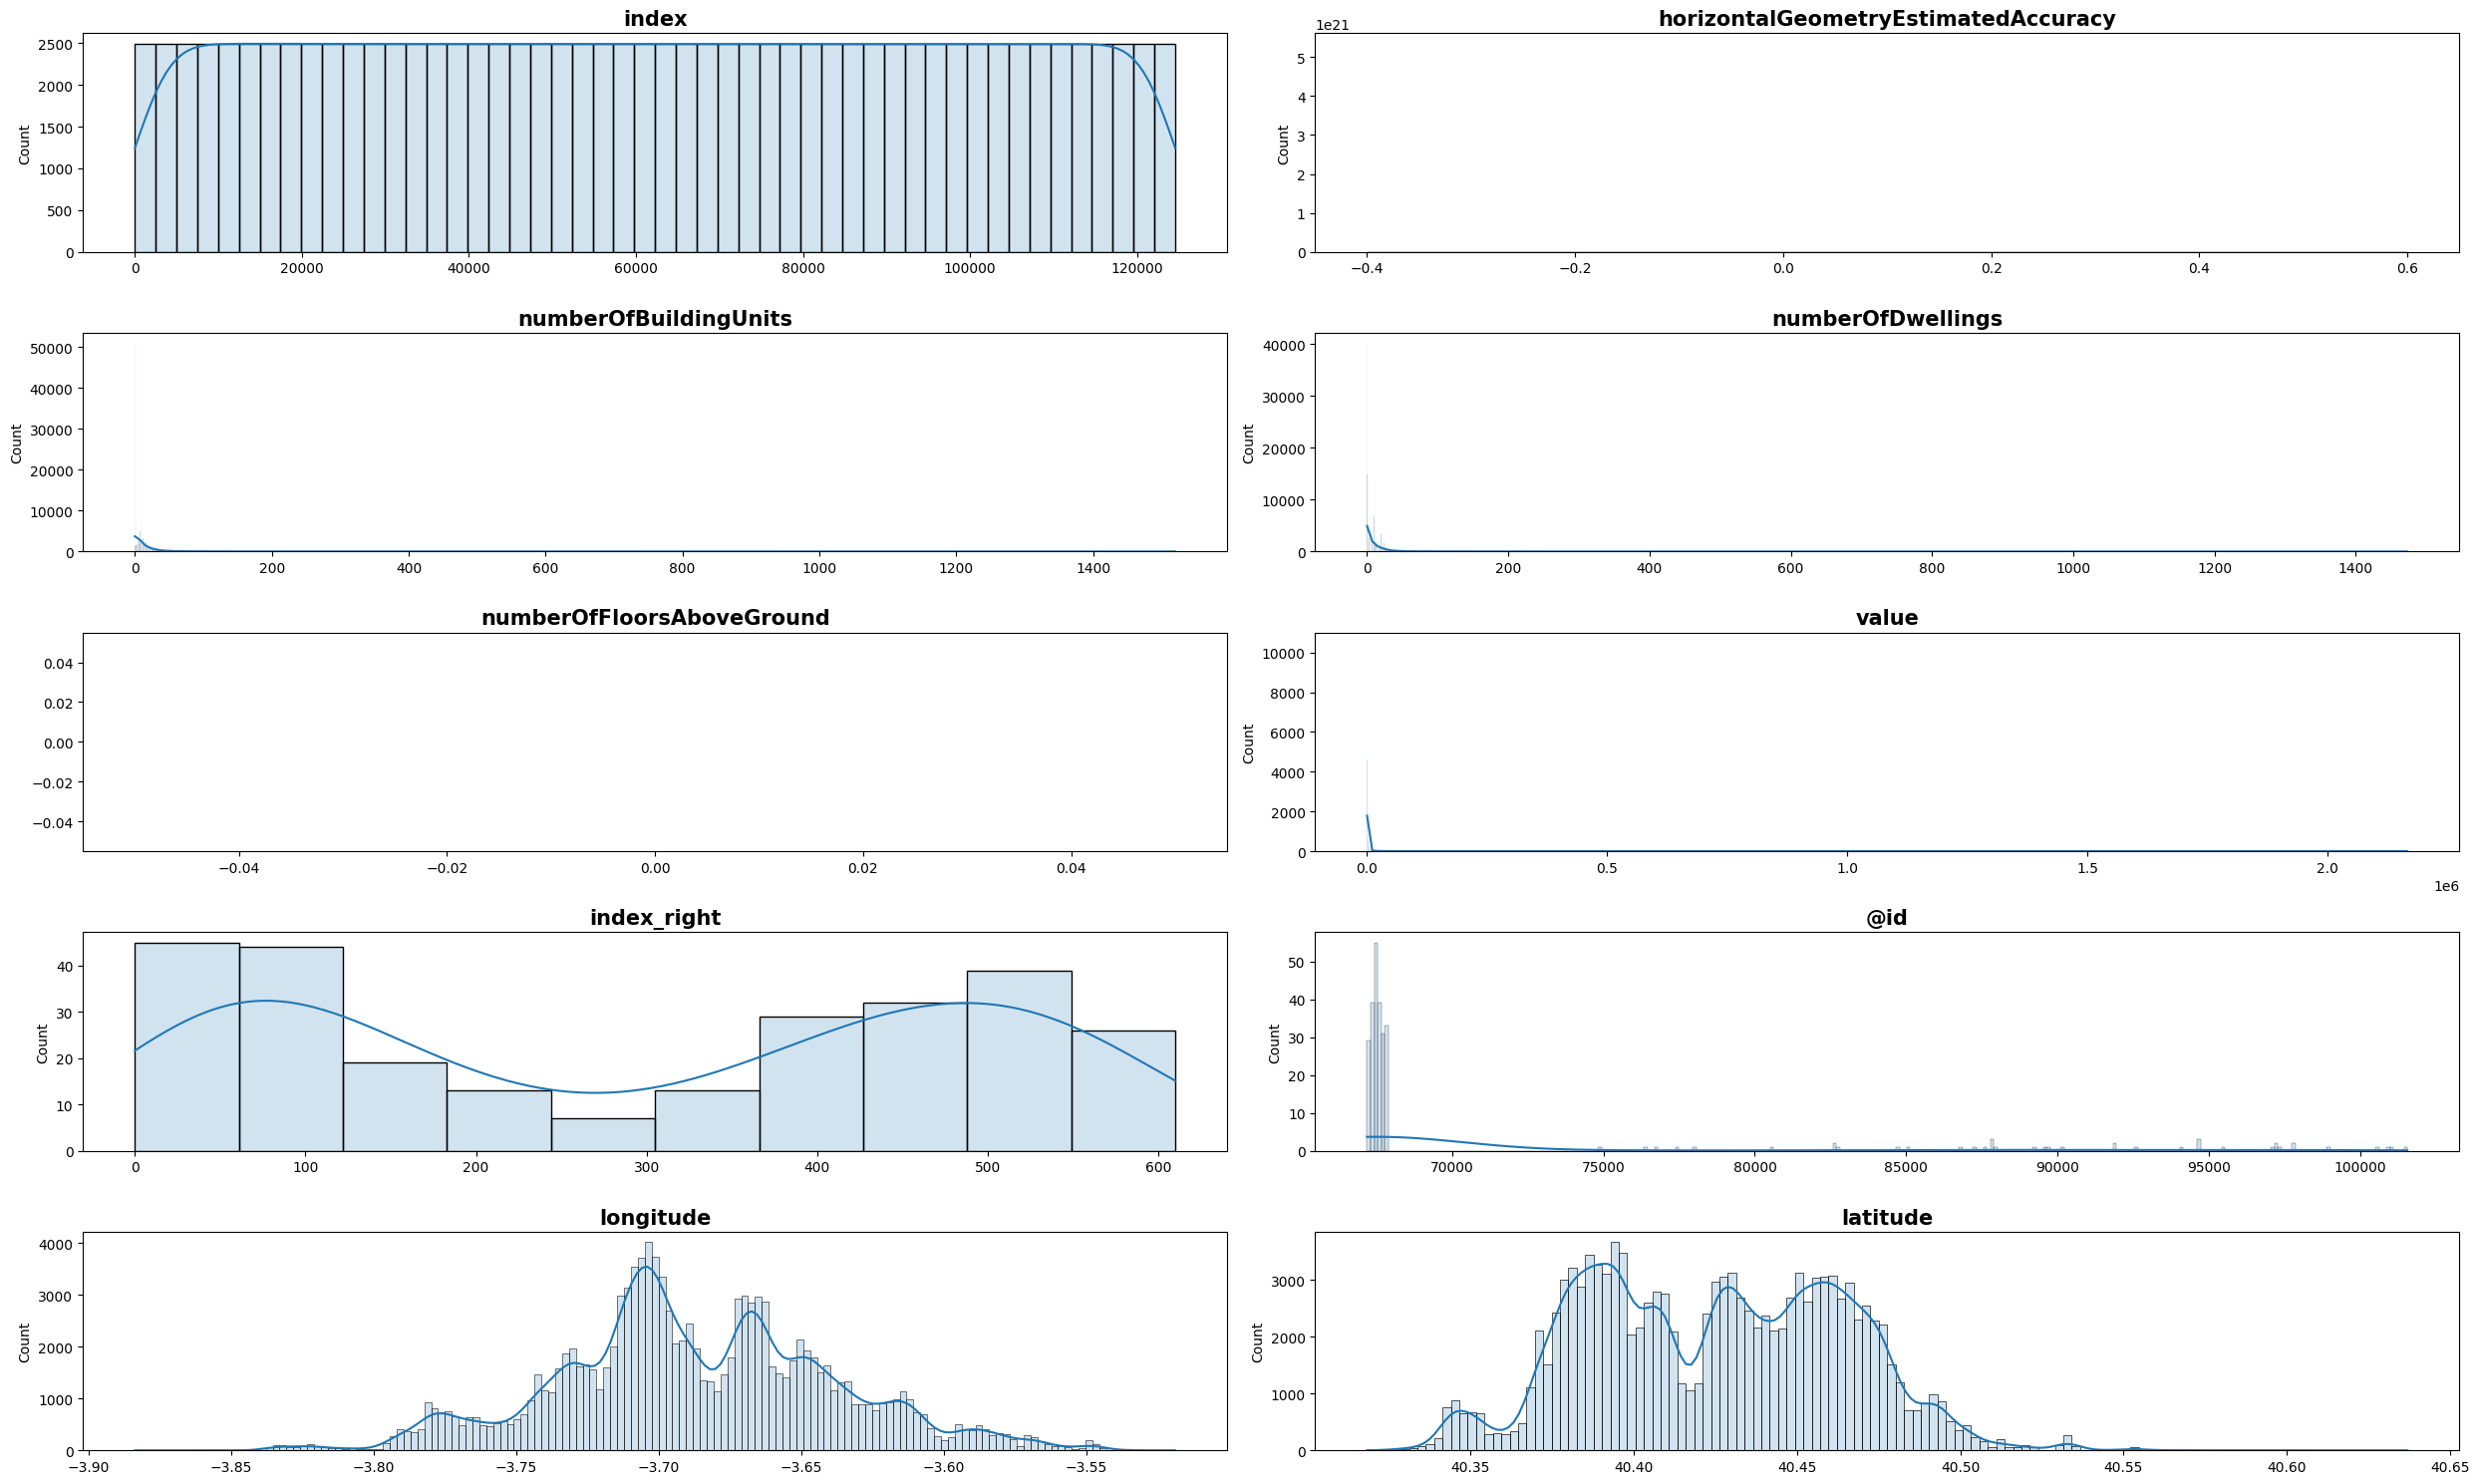

In [30]:
sch.distribucion_numericas(gdf_Building_hoteles_points)

numeric variables distribution -> outliers


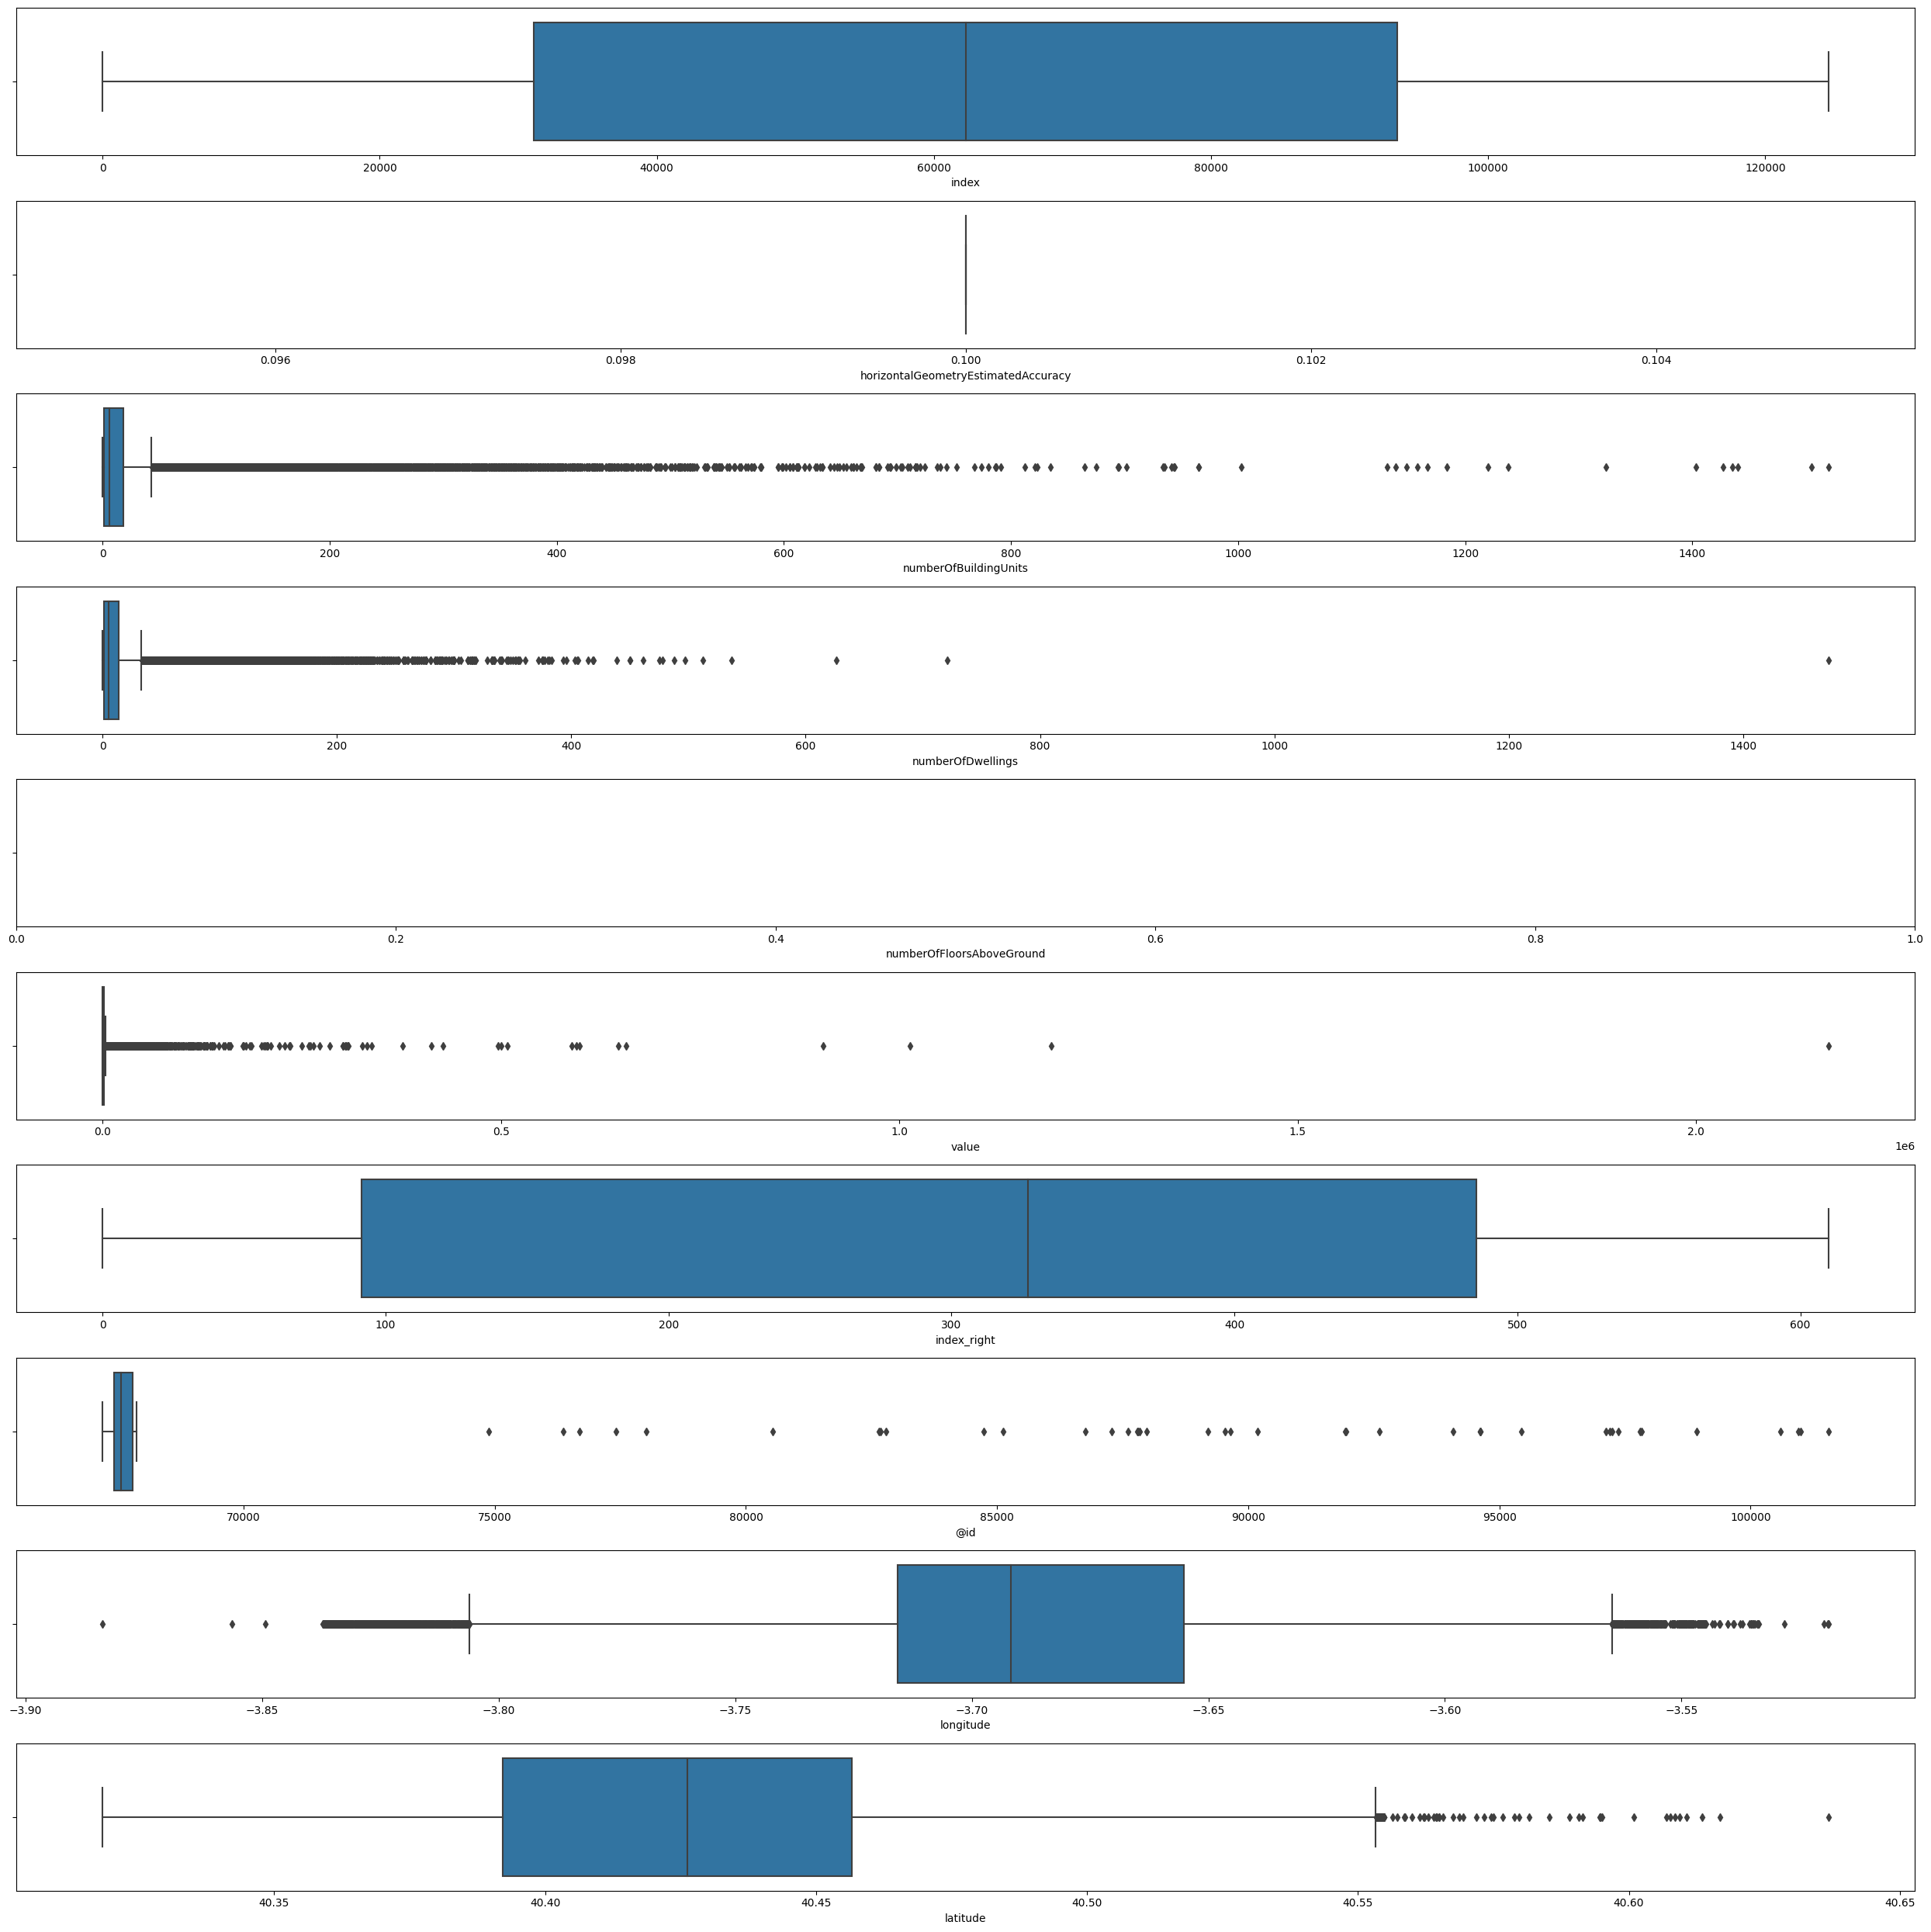

In [31]:
sch.chart_boxplot(gdf_Building_hoteles_points)

In [33]:
gdf_Building_hoteles_points.sample(10000)
map1 = folium.Map(
    location=[40.41694, -3.70361],
    tiles='cartodbpositron',
    zoom_start=12,
)
gdf_Building_hoteles_points[gdf_Building_hoteles_points['longitude'].isnull() == False].sample(10000).apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)

map1

In [32]:
sch.foliumMap(gdf_Building_hoteles_points)

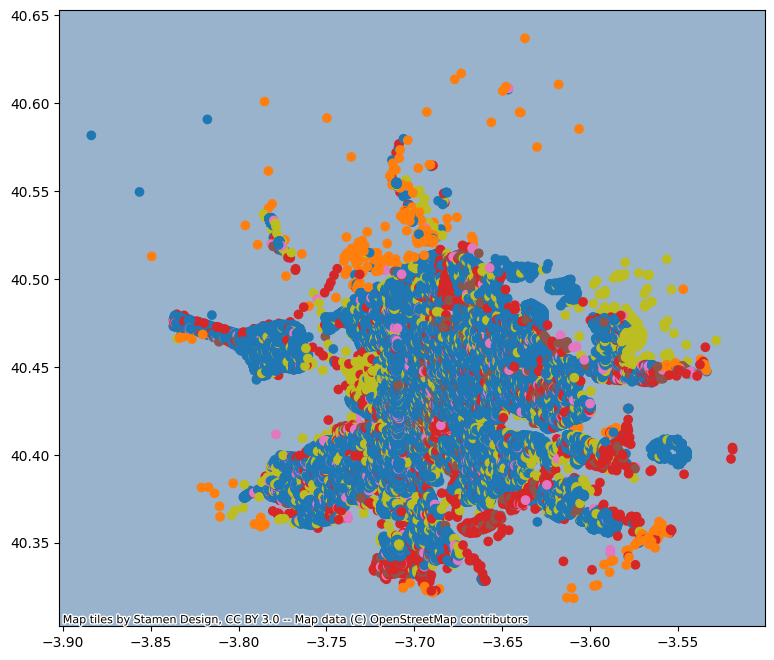

In [27]:
sch.plotMap(gdf_Building_hoteles_points, 'currentUse_Enriched')

# data export

In [34]:
sc.exportFiles(gdf_Building_hoteles_points, gdf_Building_hoteles_points, 'catastro ')